**Please Note**: I do not gamble, neither do I advise any one to do so. The work contained herein is purely for ML Practice purposes.

[Nearly all bettors lose in the long run and the small proportion of customers considered by bookmarkers to be sufficiently skilled at beating their prices may find their stakes restricted or have their accounts closed](https://www.football-data.co.uk)

Checkout this [paper](https://www.sciencedirect.com/science/article/pii/S1877050922007955) on Prediction of football match results with machine learning by F.Rodrigues and A.Pinto

### Some Overview

Sports betting consists of risking a certain amount of money by attempting to predict the outcome of a sports event, yielding a profit if a correct prediction is made and to the loss of the full amount if otherwise. The profit that can be obtained from a given bet is calculated by multiplying the amount of money gambled by the odd ot the bet. An odd is a value greater than 1 that reflects the probability of the associated event happening. The higher the probability, the lower the odd. A football match can have 3 different outcomes: A home team win, a draw or an away team win. As a result, the probability of hitting the right result by chance is 1/3, so **odds are set by betting companies in such a way that random betting leads to losses, on average**[1]. For the purpose of this practise, a football match has 2 different outcomes: The total number of goals scored is an even number, or it is an odd number. The probability of hitting the right result by change is 1/2, and likewise, the odds are set by betting companies in such a way that random betting leads to losses, on average.

In [1]:
cd ..

c:\Users\HP\Documents\ML_Practice


In [2]:
pwd

'c:\\Users\\HP\\Documents\\ML_Practice'

In [1]:
# !pip install --upgrade scikit-learn
# !pip install category_encoders
# !pip install catboost
import os
import numpy as np
import pandas as pd
from category_encoders import HashingEncoder
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [ ]:
from utils.odd_even_goals_classification import scrape_football_data

In [ ]:
# Download data
main_folder_path = os.path.join("Datasets", "football_results")
scrape_football_data(main_folder_path)

In [2]:
# chatGPT Generated
def simulate_gambling_with_biased_coin(num_tosses, bias_prob, win_amount, loss_amount):
    results = []
    winnings = 0
    num_heads = 0
    num_tails = 0

    for _ in range(num_tosses):
        # Simulate a biased coin toss (0 for tails, 1 for heads)
        toss_result = 1 if random.random() < bias_prob else 0

        # Calculate winnings and losses based on the toss result
        if toss_result == 1:
            winnings += win_amount
            num_heads += 1
        else:
            winnings -= loss_amount
            num_tails += 1

        results.append(winnings)

    print(f"Absolute Difference: {abs(num_heads - num_tails)}", \
          f"\nProportion Heads: {num_heads/num_tosses}", \
          f"\nProportion Tails: {num_tails/num_tosses}", \
          f"\nWinnings: {winnings}$", \
          f"\nTotal Amount Wagered: {num_tosses * loss_amount}$"\
          f"\nProportion of winnings to total amout wagered: {round(winnings / (num_tosses * loss_amount), 4)}")
    return results #[x/(num_tosses * loss_amount) for x in results]

Let us simulate a coin toss in which the coin is a fair coin(hence 50% probability it lands on heads and 50% probability it lands on tails). By law of large numbers(LLN), the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed. For our simulation, the expected value for heads would be 50% * number of tosses and likewise for tails. In particular, the proportion of heads after n flips will almost surely converge to 50% as n approaches infinity.

**Note**: \
However, please note that although the proportion of heads(and tails) approaches 50%, almost surely the absolute difference in the number of heads and tails will become large as the number of flips become large. Also, almost surely the ration of the absolute difference to the number of flips will approach zero.



For our simulation below, We assume we are in a gambling environment and, if the coin lands a head, we win 1\$, else, we lose 1\$

Absolute Difference: 524 
Proportion Heads: 0.500262 
Proportion Tails: 0.499738 
Winnings: 524$ 
Total Amount Wagered: 1000000$
Proportion of winnings to total amout wagered: 0.0005


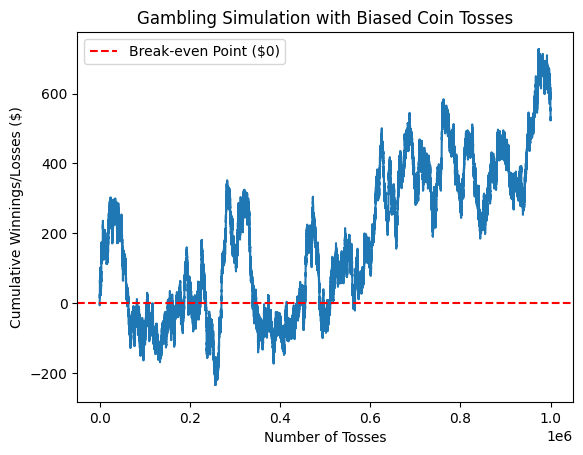

In [3]:
# Number of coin tosses and parameters for gambling
num_tosses = 1_000_000
bias_probability = 0.5  # Probability of getting heads
win_amount = 1  # Amount won for heads
loss_amount = 1  # Amount lost for tails

# Simulate gambling with biased coin tosses
simulation_results = simulate_gambling_with_biased_coin(num_tosses, bias_probability, win_amount, loss_amount)

# Plot the results
plt.plot(range(1, num_tosses + 1), simulation_results)
plt.axhline(0, color='red', linestyle='--', label='Break-even Point ($0)')
plt.xlabel('Number of Tosses')
plt.ylabel('Cumulative Winnings/Losses ($)')
plt.title('Gambling Simulation with Biased Coin Tosses')
plt.legend()
plt.show()

Experiment with different values of `num_tosses` to see how the absolute difference number of heads and number of tails become large even though the proportions tend to get closer to the their expected values as `num_tosses` become grows. This is inline with previous explanations.

For our simulation above, the expected profit can be calculated as:\
`EV = (Probability of Heads × Payout for Heads) + (Probability of Tails × Payout for Tails)`\
`EV = (50% * 1) + (50% * -1)`\
`EV = 0.0`\
This means the proportion of our expected profit to the total amount wagered should be 0.0(i.e 0% of total amount wagered),  You don't lose any money, neither do you win. Bearing in mind that you wager 1\$(loss_amount) on each coin toss, the total amount wagered would be `num_tosses * 1$`. The proportion of your winnings(even though the winnings itself alternates between positive and negative values due to phenomenon explained in preceding blocks) to the total amount wagered, if the simulation is run multiple times, will always tend to be 0.0 for large numbers of coin tosses.


---


That said, it is worthy to note that no bookmarker offers odds in ways where it won't profit, as such, even though in the case of this practise where the probability of the total number of goals scored in a match being either an odd or even number is 50%-50%(like a coin toss - random chance), the bookmarkers won't pay out 1\$ if you win, rather, at the time of this practise, most bookmarkers researched tend to give between 0.8\$ - 0.9\$(english premier league matches on bet365 and bet9ja were considered). That means, if you win, you get 0.8\$ minimum on average, if your prediction is wrong, you lose 1$\. [Odd even goal odds will usually stand at around 1.9](https://www.soccerbetting365.com/home-team-oddeven-goals/#OddEven_Goals_Stats).

The expected value in this case can thus be calculated as:\
`EV = (Probability of Heads × Payout for Heads) + (Probability of Tails × Payout for Tails)`\
`EV = (50% * 0.8) + (50% * -1)`\
`EV = -0.1`\

What this means is that if you play long enough, you are definitely going to lose money. The proportion of money you will lose to the total amount wagered is 0.1(i.e 10% of total amount wagered). Let us run the simulation below with new values for win_amount to prove that.

Absolute Difference: 656 
Proportion Heads: 0.499672 
Proportion Tails: 0.500328 
Winnings: -100590.39999910648$ 
Total Amount Wagered: 1000000$
Proportion of winnings to total amout wagered: -0.1006


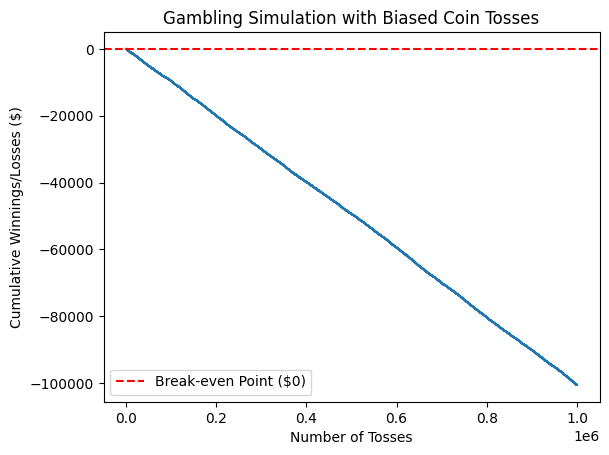

In [4]:
# Number of coin tosses and parameters for gambling
num_tosses = 1_000_000
bias_probability = 0.5  # Probability of getting heads
win_amount = 0.8  # Amount won for heads
loss_amount = 1  # Amount lost for tails

# Simulate gambling with biased coin tosses
simulation_results = simulate_gambling_with_biased_coin(num_tosses, bias_probability, win_amount, loss_amount)

# Plot the results
plt.plot(range(1, num_tosses + 1), simulation_results)
plt.axhline(0, color='red', linestyle='--', label='Break-even Point ($0)')
plt.xlabel('Number of Tosses')
plt.ylabel('Cumulative Winnings/Losses ($)')
plt.title('Gambling Simulation with Biased Coin Tosses')
plt.legend()
plt.show()

The above shows that even if you randomly guess the outcome and win 50% of the time, if you play long enough, you will lose 10% of total amount wagered(This is if a win gets you 0.8$ extra - 1.8odds)

let us calculate the percentage of wins necessarily in order to break even(We win if our prediction is right - this, we've represented as a coin toss landing a heads)
```
EV = (Probability of Heads × Payout for Heads) + (Probability of Tails × Payout for Tails)
EV = 0
probability of heads = x
probability of tails = y = 1 - x
0 = (x * 0.8) + (y * -1)
x = 0.556 or 55.56%
y = 0.444 or 44.44%
```

In the context of betting odds, this probabily of winning can be viewed as the implied probability(implied probability is the probability that a bookmaker assigns to an outcome based on the odds they offer. for decimal odds, this is calculated as `1/odds_offered` = `1/1.8` = `0.5556`. By this, the bookmarker implies that there is a 55.56% chance of you winning(or landing a head). In real sense, since odd/even goals and coin tosses are most likely unpredictable, the actual probability that you win is 50% as explained in above sections. The difference between this implied probability and actual probability ensures that the bookmarker is profitable in the long run. in this case, it is profitable by 55.56% - 50% = 5.56%. As our calculation above has shown, to break even, we need to be right 55.56% of the time. Any value above this will result in profit(not a loss) that can be calculated by using the `Expected Value` formula.

The below simulation verifies the above. Increase the `bias_probability` to see the proportion of total wager you should expect to make in the long run. The greater the probability, the greater the proportion. Please Note that this `bias_probability` implies that you(or your model) will be right `bias_probability * 100%` of the time.

Absolute Difference: 111502 
Proportion Heads: 0.555751 
Proportion Tails: 0.444249 
Winnings: 351.7999999967219$ 
Total Amount Wagered: 1000000$
Proportion of winnings to total amout wagered: 0.0004


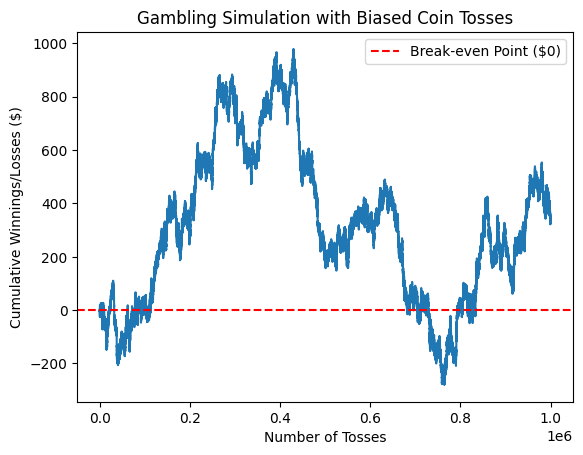

In [6]:
# Number of coin tosses and parameters for gambling
num_tosses = 1_000_000
bias_probability = 0.5556  # Probability of getting heads
win_amount = 0.8  # Amount won for heads
loss_amount = 1  # Amount lost for tails

# Simulate gambling with biased coin tosses
simulation_results = simulate_gambling_with_biased_coin(num_tosses, bias_probability, win_amount, loss_amount)

# Plot the results
plt.plot(range(1, num_tosses + 1), simulation_results)
plt.axhline(0, color='red', linestyle='--', label='Break-even Point ($0)')
plt.xlabel('Number of Tosses')
plt.ylabel('Cumulative Winnings/Losses ($)')
plt.title('Gambling Simulation with Biased Coin Tosses')
plt.legend()
plt.show()

For this practise purpose, we are going to attempt building a model to predict odd/even goals of english premier league matches. Our model should have an accuracy of more than 55.56%.

**Note**\
The odds of even goals tend to be lower(closer to 1.8) while odds of odd goals tend to be higher(closer to 1.9). This is due to the fact that games start with an even number(0-0), hence even goals are seen as being more likely by bookies. Also, having more than 6goals in a match is rare, hence the outcome is slightly skewed to "Even goals" as there are more possibilities of having an even number of goals(0, 2, 4, 6) compared to that for odd numbers(1, 3, 5). Football match results are unpredictable, so, even though rare, matches may still end up with goals greater than 6. Another factor that contributes to this skewness and why even goals odds are lower is a match draw. [Draws happen 25% of the time in soccer](https://parimatch.co.tz/blog/en/goals-odd-even/#:~:text=Summary%20on%20Odd%2FEven%20Goals&text=With%20roughly%20a%2050%2F50,the%20profit%20margin%20is%20slim.) so it is an important factor. Because draws are always even numbers, if the match has a high probability of ending in a draw, its even goals odds would be lower.

***For this practise purpose, decimal odds are used**

### Functions Used

In [7]:
def get_sample_dataset(dataset_path):
    return pd.read_csv(dataset_path, parse_dates=["Date"],
                       dayfirst=True,encoding='ANSI', on_bad_lines='skip')

In [8]:
def extract_targets(dataset):
    """
    Extracts targets from the dataset.

    Returns
    ------
    dataset: The dataset without the targets
    y: A dataset containing the targets
    """
    y = pd.Series((dataset["HG"] + dataset["AG"]) % 2, name="odd_goals") # 1 if total goals is odd, 0 if otherwise
    return dataset.copy(), y

def custom_train_test_split(X, y, train_start, train_stop, test_start, test_stop):
    # assert "Season" in X, "Please ensure the dataset passed has a `Season` column"
    
    # seasons are given in the form of year(int) eg. 2014. We convert them to datetime and set them as index so
    # we can get datasets using formats such as df["2014":"2018"]
    X = X.copy()
    y = y.copy()
    X["Season"] = pd.to_datetime(X["Season"], format='%Y')
    X.set_index("Season", inplace=True)
    

    X_train = X[train_start:train_stop].reset_index()
    X_test = X[test_start:test_stop].reset_index()
    
    # set y's index to X index for same reasons as above comment
    y.index = X.index
    
    y_train = y[train_start:train_stop].reset_index(drop=True)
    y_test = y[test_start:test_stop].reset_index(drop=True)

    # convert season back to its initial int dtype
    X_train["Season"] = X_train["Season"].dt.year
    X_test["Season"] = X_test["Season"].dt.year
    
    return X_train, X_test, y_train, y_test

In [19]:
def join_teams(row):
    home = row["Home"]
    away = row["Away"]
    return home + "&" + away if home < away else away + "&" + home
def prop_count_grouping(dataset, col, col2="odd_goals"):
    odd_even_goals_count = dataset[[col, col2]].groupby([col, col2]).size()
    odd_even_goals_proportion = odd_even_goals_count / odd_even_goals_count.groupby(level=0).sum()

    new_df = pd.DataFrame(dict(prop=odd_even_goals_proportion, count=odd_even_goals_count))
    new_df["other_count"] = new_df.apply(lambda x: round(x["count"]*(1-x["prop"])/x["prop"], 2), axis=1)
    
    return new_df

### Get the Data

| S/N | Field Name | Description                                                |
|-----|------------|------------------------------------------------------------|
| 1   | Home       | Name of team playing on home grounds                       |
| 2   | Away       | Name of team playing away                                  |
| 3   | HG         | Home team goals at the end of match                        |
| 4   | AG         | Away team goals at the end of match                        |
| 5   | Res        | Match Results(H: Home team win, A: Away Team win, D: Draw) |
| 6   | Referee    | Name of Referee                                            |
| 7   | HS         | Total Home Shots                                           |
| 8   | AS         | Total Away Shots                                           |
| 9   | HST        | Total Home Team Shots on Target                            |
| 10  | AST        | Total Away Team Shots on Target                            |

Checkout [fooball-data.co notes](https://www.football-data.co.uk/notes.txt) for more details on the data collected.

In [21]:
rough_dataset = pd.read_csv("football_data2.csv", parse_dates=["Date"])

C:\Users\USER\AppData\Local\Temp\ipykernel_5856\811466421.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  rough_dataset = pd.read_csv("football_data2.csv", parse_dates=["Date"])


In [22]:
dataset = rough_dataset[['Date', 'Country', 'Season',
       'League', 'Home', 'Away', 'HG', 'AG', 'Res', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A']].dropna()

In [23]:
# let's treat the data as a time series. This is because my initial assumption is that past
# results may have some influence on present results. For this reason, I am not shuffling.
# However, our model may need to have an idea of current standings hence there might still
# be a need to shuffle

# We have 16seasons, we'll use 10 for training, 4 for testing(2023 is not a full season yet though) and 2 for validation.
X, y = extract_targets(dataset)
X_train_val, X_test, y_train_val, y_test = custom_train_test_split(X, y, train_start="2008", \
                                                                   train_stop="2019", test_start="2020", 
                                                                   test_stop="2023")
X_train, X_val, y_train, y_val = custom_train_test_split(X_train_val, y_train_val, train_start="2008", \
                                                                   train_stop="2017", test_start="2018", 
                                                                   test_stop="2019" )

### EDA

In [24]:
eda_dataset = X_val.join(y_val)
eda_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Season     760 non-null    int32         
 1   Date       760 non-null    datetime64[ns]
 2   Country    760 non-null    object        
 3   League     760 non-null    object        
 4   Home       760 non-null    object        
 5   Away       760 non-null    object        
 6   HG         760 non-null    float64       
 7   AG         760 non-null    float64       
 8   Res        760 non-null    object        
 9   HTHG       760 non-null    float64       
 10  HTAG       760 non-null    float64       
 11  HTR        760 non-null    object        
 12  Referee    760 non-null    object        
 13  HS         760 non-null    float64       
 14  AS         760 non-null    float64       
 15  HST        760 non-null    float64       
 16  AST        760 non-null    float64       
 1

In [25]:
eda_dataset.describe()

,Season,Date,HG,AG,HTHG,HTAG,HS,AS,HST,AST,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,odd_goals
count,760.000000,760,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.00000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2018.500000,2019-07-10 07:27:09.473684224,1.542105,1.228947,0.689474,0.561842,13.728947,11.272368,4.667105,3.961842,...,5.739474,4.742105,1.556579,1.72500,0.052632,0.068421,3.118553,4.442461,5.170697,0.473684
min,2018.000000,2018-08-10 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.060000,3.000000,1.120000,0.000000
25%,2018.000000,2018-12-28 12:00:00,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,1.00000,0.000000,0.000000,1.610000,3.400000,2.250000,0.000000
50%,2018.500000,2019-06-25 12:00:00,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,...,5.000000,4.500000,1.000000,2.00000,0.000000,0.000000,2.250000,3.750000,3.300000,0.000000
75%,2019.000000,2019-12-28 00:00:00,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,...,8.000000,6.000000,2.000000,2.00000,0.000000,0.000000,3.262500,4.750000,6.000000,1.000000
max,2019.000000,2020-07-26 00:00:00,8.000000,9.000000,5.000000,5.000000,36.000000,26.000000,14.000000,15.000000,...,17.000000,16.000000,6.000000,6.00000,2.000000,2.000000,23.000000,17.000000,41.000000,1.000000
std,0.500329,NaN,1.280570,1.189636,0.873196,0.762332,5.651747,4.962125,2.600997,2.387355,...,3.094986,2.787950,1.231753,1.21341,0.229265,0.257796,2.801141,1.749321,5.177773,0.499636


In [ ]:
def prepare_match_data(dataset):
    dataset = dataset.copy()
    
    # Add total goals scored in match
    dataset["TG"] = dataset["HG"] + dataset["AG"]
    # Add is_draw indicator to check if match ended in draw or not
    dataset["is_draw"] = np.where(dataset["Res"] == "D", 1.0, 0.0)
    
    dataset["Home"] = dataset["Home"].str.strip()
    dataset["Away"] = dataset["Away"].str.strip()
    
    dataset["Home&Away"] = dataset[["Home", "Away"]].apply(join_teams, axis=1)
    
    dataset["Season"] = dataset["Season"].astype(np.uint16)
    
    # get date details from date
    dataset["day"] = dataset["Date"].dt.day
    dataset["dayofweek"] = dataset["Date"].dt.day_of_week
    dataset["week"] = dataset["Date"].dt.isocalendar()["week"]
    dataset["month"] = dataset["Date"].dt.month
    dataset["quarter"] = dataset["Date"].dt.quarter
    dataset["year"] = dataset["Date"].dt.year
    
    # drop country and League columns since they contain the same values all through
    # drop the date too, we'll work with the details extracted from it
    return dataset.drop(columns=["Country", "League", "Date"])

In [27]:
# cols1 are columns whose values we can get before a match.
# cols2 are columns whose values come after a match
cols1 = ["Season", "Home", "Away", "Referee", "B365H", "B365D", "B365A", "day", "dayofweek", "week", \
         "month", "quarter", "year"] 
cols2 = ["HG", "AG", "Res", "HTHG", "HTAG", "HTR", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", \
         "HY", "AY", "HR", "AR", "TG", "is_draw"]

# cat_cols are categorical attributes
# num_cols are numerical attributes
cat_cols = ["Home", "Away", "Res", "HTR", "Referee"]
num_cols = ["Season", "HG", "AG", "HTHG", "HTAG", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC",\
           "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A",  "TG", "is_draw", "day", "dayofweek", "week", \
           "month", "quarter", "year"]

In [ ]:
eda_dataset = X_train.join(y_train_val)
eda_dataset = prepare_match_data(eda_dataset)

### Proportion of total goals scored and Distribution of Even/Odd goals

In [29]:
eda_dataset["TG"].value_counts(normalize=True).mul(100).round(1).astype("str") + "%"

TG
2.0     23.3%
3.0     22.6%
1.0     16.6%
4.0     16.1%
5.0      8.2%
0.0      7.7%
6.0      3.3%
7.0      1.3%
8.0      0.5%
9.0      0.2%
10.0     0.1%
Name: proportion, dtype: object

In [30]:
eda_dataset["odd_goals"].value_counts(normalize=True).mul(100).round(1).astype("str") + "%"
# The results below show that the total goals are a little skewed to more even goals(51.1%)

odd_goals
0.0    51.1%
1.0    48.9%
Name: proportion, dtype: object

In [31]:
# Check the distribution of odd/even goals on days of the week
eda_dataset[["dayofweek",  "odd_goals"]].groupby("dayofweek").value_counts(normalize=True, \
                                        sort=False).mul(100).round(1).astype("str") + "%"

dayofweek  odd_goals
0          0.0          51.6%
           1.0          48.4%
1          0.0          52.8%
           1.0          47.2%
2          0.0          51.4%
           1.0          48.6%
3          0.0          57.9%
           1.0          42.1%
4          0.0          48.3%
           1.0          51.7%
5          0.0          50.3%
           1.0          49.7%
6          0.0          52.1%
           1.0          47.9%
Name: proportion, dtype: object

In [32]:
prop_count_grouping(eda_dataset, "Home&Away")

prop  count  other_count
Home&Away           odd_goals                              
Arsenal&Aston Villa 0.0        0.444444      8         10.0
                    1.0        0.555556     10          8.0
Arsenal&Birmingham  0.0        0.500000      2          2.0
                    1.0        0.500000      2          2.0
Arsenal&Blackburn   0.0        0.625000      5          3.0
...                                 ...    ...          ...
West Ham&Wigan      1.0        0.750000      6          2.0
West Ham&Wolves     0.0        0.750000      6          2.0
                    1.0        0.250000      2          6.0
Wigan&Wolves        0.0        0.500000      3          3.0
                    1.0        0.500000      3          3.0

[1024 rows x 3 columns]

In [33]:
prop_count_grouping(eda_dataset, "Referee")[:50]

prop  count  other_count
Referee       odd_goals                              
A Madley      0.0        0.384615      5          8.0
              1.0        0.615385      8          5.0
A Marriner    0.0        0.546980    163        135.0
              1.0        0.453020    135        163.0
A Taylor      0.0        0.484496    125        133.0
              1.0        0.515504    133        125.0
A Wiley       0.0        0.370370     20         34.0
              1.0        0.629630     34         20.0
C Foy         0.0        0.575000     92         68.0
              1.0        0.425000     68         92.0
C Kavanagh    0.0        0.515152     34         32.0
              1.0        0.484848     32         34.0
C Pawson      0.0        0.464968     73         84.0
              1.0        0.535032     84         73.0
D Coote       0.0        0.500000     14         14.0
              1.0        0.500000     14         14.0
D England     1.0        1.000000      1          0.0
G Scott       0.0        0.485294     33         35.0
              1.0        0.514706     35         33.0
H Webb        0.0        0.486188     88         93.0
              1.0        0.513812     93         88.0
J Moss        0.0        0.475556    107        118.0
              1.0        0.524444    118        107.0
K Friend      0.0        0.515284    118        111.0
              1.0        0.484716    111        118.0
K Stroud      0.0        0.625000      5          3.0
              1.0        0.375000      3          5.0
L Mason       0.0        0.509881    129        124.0
              1.0        0.490119    124        129.0
L Probert     0.0        0.494118     84         86.0
              1.0        0.505882     86         84.0
M Atkinson    0.0        0.494048    166        170.0
              1.0        0.505952    170        166.0
M Clattenburg 0.0        0.512077    106        101.0
              1.0        0.487923    101        106.0
M Dean        0.0        0.510029    178        171.0
              1.0        0.489971    171        178.0
M Halsey      0.0        0.534091     47         41.0
              1.0        0.465909     41         47.0
M Jones       0.0        0.504950    102        100.0
              1.0        0.495050    100        102.0
M Oliver      0.0        0.526316    140        126.0
              1.0        0.473684    126        140.0
M Riley       0.0        0.695652     16          7.0
              1.0        0.304348      7         16.0
Mn Atkinson   1.0        1.000000      2          0.0
N Swarbrick   0.0        0.515152     68         64.0
              1.0        0.484848     64         68.0
O Langford    0.0        1.000000      1          0.0
P Bankes      0.0        0.818182      9          2.0

In [34]:
eda_dataset["B365D"].sort_values().value_counts(sort=False)

B365D
3.00      13
3.10      50
3.20     172
3.25     356
3.29      20
3.30     453
3.39      27
3.40     540
3.50     446
3.60     406
3.70      41
3.75     226
3.79      10
3.80     167
3.89       9
3.90      55
4.00     264
4.09       1
4.10      13
4.20     133
4.25       1
4.33     120
4.40       6
4.50     138
4.59       3
4.60       6
4.75     108
4.80       1
5.00     126
5.10       2
5.25      68
5.50     115
5.75      40
6.00     108
6.25       6
6.50      93
6.75       5
7.00      62
7.50      37
8.00      33
8.50      22
9.00      22
9.50       5
10.00      9
11.00     13
12.00      2
13.00      5
15.00      1
17.00      1
Name: count, dtype: int64

In [35]:
eda_dataset["B365D"].describe()

count    4560.000000
mean        4.096776
std         1.260679
min         3.000000
25%         3.400000
50%         3.600000
75%         4.330000
max        17.000000
Name: B365D, dtype: float64

In [36]:
eda_dataset[eda_dataset["B365A"] == 4.5][["Home", 'Away', "B365H", "B365D", "B365A", "TG", "odd_goals"]][:50]

,Home,Away,B365H,B365D,B365A,TG,odd_goals
1,Bolton,Stoke,1.83,3.50,4.5,4.0,0.0
24,Bolton,West Brom,1.83,3.50,4.5,0.0,0.0
86,Chelsea,Liverpool,1.91,3.25,4.5,1.0,1.0
88,Portsmouth,Fulham,1.83,3.50,4.5,2.0,0.0
89,Newcastle,West Brom,1.83,3.50,4.5,3.0,1.0
128,Everton,Middlesbrough,1.83,3.50,4.5,2.0,0.0
134,Portsmouth,Hull,1.80,3.60,4.5,4.0,0.0
172,Blackburn,Stoke,1.83,3.50,4.5,3.0,1.0
184,Man City,Hull,1.80,3.60,4.5,6.0,0.0
221,Blackburn,Bolton,2.00,3.25,4.5,4.0,0.0


In [37]:
# eda_dataset[["odd_goals", "B365H"]].groupby("odd_goals").value_counts()[:50]
prop_count_grouping(eda_dataset, "B365A").sort_values(by="count", ascending=False)[:50]

prop  count  other_count
B365A odd_goals                              
3.00  0.0        0.557252     73         58.0
4.50  0.0        0.554688     71         57.0
4.00  0.0        0.504132     61         60.0
      1.0        0.495868     60         61.0
3.40  0.0        0.517544     59         55.0
3.60  0.0        0.522124     59         54.0
3.00  1.0        0.442748     58         73.0
3.50  1.0        0.517857     58         54.0
4.50  1.0        0.445312     57         71.0
15.00 1.0        0.518519     56         52.0
3.40  1.0        0.482456     55         59.0
3.60  1.0        0.477876     54         59.0
3.50  0.0        0.482143     54         58.0
6.50  0.0        0.666667     54         27.0
3.75  0.0        0.557895     53         42.0
15.00 0.0        0.481481     52         56.0
5.00  1.0        0.542553     51         43.0
6.00  1.0        0.504950     51         50.0
      0.0        0.495050     50         51.0
4.20  0.0        0.538462     49         42.0
3.10  1.0        0.539326     48         41.0
10.00 1.0        0.535714     45         39.0
7.50  0.0        0.592105     45         31.0
4.33  0.0        0.611111     44         28.0
9.00  1.0        0.565789     43         33.0
5.00  0.0        0.457447     43         51.0
3.75  1.0        0.442105     42         53.0
4.20  1.0        0.461538     42         49.0
11.00 1.0        0.512500     41         39.0
3.10  0.0        0.460674     41         48.0
2.50  0.0        0.555556     40         32.0
3.80  0.0        0.512821     40         38.0
4.75  0.0        0.512821     40         38.0
11.00 0.0        0.487500     39         41.0
10.00 0.0        0.464286     39         45.0
5.50  1.0        0.535211     38         33.0
3.80  1.0        0.487179     38         40.0
4.75  1.0        0.487179     38         40.0
8.00  0.0        0.550725     38         31.0
2.88  1.0        0.513514     38         36.0
3.20  0.0        0.544118     37         31.0
2.88  0.0        0.486486     36         38.0
12.00 1.0        0.590164     36         25.0
2.75  0.0        0.537313     36         31.0
2.80  0.0        0.564516     35         27.0
3.25  1.0        0.523077     34         31.0
7.00  0.0        0.515152     34         32.0
5.50  0.0        0.464789     33         38.0
9.00  0.0        0.434211     33         43.0
3.30  0.0        0.523810     33         30.0

In [38]:
prop_count_grouping(eda_dataset, "B365H")#.sort_values(by="prop", ascending=False)[50:100]

prop  count  other_count
B365H odd_goals                              
1.06  0.0        1.000000      1          0.0
1.07  1.0        1.000000      2          0.0
1.08  0.0        0.333333      2          4.0
      1.0        0.666667      4          2.0
1.09  0.0        1.000000      1          0.0
...                   ...    ...          ...
17.00 1.0        0.500000      1          1.0
19.00 1.0        1.000000      2          0.0
21.00 0.0        0.500000      1          1.0
      1.0        0.500000      1          1.0
23.00 1.0        1.000000      2          0.0

[241 rows x 3 columns]

In [39]:
eda_dataset[["Home", "Away", "odd_goals"]].groupby("Home").value_counts()[:50]

Home     Away            odd_goals
Arsenal  Man City        0.0          8
         Liverpool       0.0          8
         Everton         0.0          8
         Man United      0.0          7
         Tottenham       0.0          7
         Sunderland      0.0          7
         Newcastle       1.0          7
         Aston Villa     1.0          6
         Chelsea         0.0          6
                         1.0          6
         West Ham        0.0          6
         West Brom       1.0          6
         Man United      1.0          5
         Fulham          0.0          5
         West Ham        1.0          5
         Tottenham       1.0          5
         Swansea         1.0          5
         Stoke           1.0          5
                         0.0          5
         Liverpool       1.0          4
         Southampton     1.0          4
                         0.0          4
         Man City        1.0          4
         Leicester       1.0          4
     

In [40]:
eda_dataset[["Home", "Away", "odd_goals"]].groupby("odd_goals").value_counts()[:50]

odd_goals  Home         Away       
0.0        Everton      Liverpool      11
           Liverpool    Arsenal        10
                        Chelsea        10
           West Ham     Man United      9
           Chelsea      Arsenal         9
           Tottenham    Chelsea         9
                        Man United      9
           Sunderland   Stoke           8
           Chelsea      Everton         8
           Liverpool    Tottenham       8
           Everton      West Ham        8
                        Man United      8
           West Ham     Arsenal         8
           Newcastle    Liverpool       8
                        Man City        8
           Everton      Man City        8
           Man City     Everton         8
           Liverpool    Everton         8
           Arsenal      Everton         8
                        Man City        8
                        Liverpool       8
           West Ham     West Brom       7
           Chelsea      Tottenham       

In [41]:
eda_dataset

,Season,Home,Away,HG,AG,Res,HTHG,HTAG,HTR,Referee,...,odd_goals,TG,is_draw,Home&Away,day,dayofweek,week,month,quarter,year
0,2008,Arsenal,West Brom,1.0,0.0,H,1.0,0.0,H,H Webb,...,1.0,1.0,0.0,Arsenal&West Brom,16,5,33,8,3,2008
1,2008,Bolton,Stoke,3.0,1.0,H,3.0,0.0,H,C Foy,...,0.0,4.0,0.0,Bolton&Stoke,16,5,33,8,3,2008
2,2008,Everton,Blackburn,2.0,3.0,A,1.0,1.0,D,A Marriner,...,1.0,5.0,0.0,Blackburn&Everton,16,5,33,8,3,2008
3,2008,Hull,Fulham,2.0,1.0,H,1.0,1.0,D,P Walton,...,1.0,3.0,0.0,Fulham&Hull,16,5,33,8,3,2008
4,2008,Middlesbrough,Tottenham,2.0,1.0,H,0.0,0.0,D,M Atkinson,...,1.0,3.0,0.0,Middlesbrough&Tottenham,16,5,33,8,3,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,2019,Crystal Palace,Tottenham,1.0,1.0,D,0.0,1.0,A,A Marriner,...,0.0,2.0,1.0,Crystal Palace&Tottenham,26,6,30,7,3,2020
4556,2019,Chelsea,Wolves,2.0,0.0,H,2.0,0.0,H,S Attwell,...,0.0,2.0,0.0,Chelsea&Wolves,26,6,30,7,3,2020
4557,2019,Burnley,Brighton,1.0,2.0,A,1.0,1.0,D,J Moss,...,1.0,3.0,0.0,Brighton&Burnley,26,6,30,7,3,2020
4558,2019,Arsenal,Watford,3.0,2.0,H,3.0,1.0,H,M Dean,...,1.0,5.0,0.0,Arsenal&Watford,26,6,30,7,3,2020


In [42]:
import statistics
def expanding_mode(series):
    modes = []
    for i in range(1, len(series) + 1):
        mode = statistics.mode(series[:i])
        modes.append(mode)
    return pd.Series(modes, index=series.index)

In [43]:
def expanding_proportion(series):
    proportions = []
    for i in range(1, len(series) + 1):
        c_series = series[:i]
        proportion = c_series.sum() / len(c_series)
        proportions.append(proportion)
    return pd.Series(proportions, index=series.index)

In [ ]:
def add_cumulative_team_performance_features(dataset):
    df = dataset.copy()

    # Sort the DataFrame by season and date (assuming you have a date column)
    # df.sort_values(['Season'], inplace=True)

    # Calculate the average goals for the home team in previous home matches
    df['Average Goals by Home at Home'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Calculate the average goals conceded by the home team in previous home matches
    df['Average Goals Conceded by Home at Home'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Calculate the average goals for the away team in previous home matches
    df['Average Goals by Away while Away'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Calculate the average goals conceded by the away team in previous away matches
    df['Average Goals Conceded by Away while Away'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Calculate the average total goals scored in matches played by home team while at home
    df['Average Total Goals scored in matches played by home team while at home'] = df.groupby(['Season', 'Home'])['TG'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Calculate the average total goals scored in matches played by away team while away
    df['Average Total Goals scored in matches played by away team while away'] = df.groupby(['Season', 'Away'])['TG'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Calculate the total goals scored by the home team in all previous matches, at home and away
    # Calculate the total goals scored by the away team in all previous matches, at home and away

    # most frequent outcome of matches played by home team at home
    df["Most Frequent Outcome of Matches played by home team at home"] = df.groupby(['Season', 'Home'])['Res'].transform(lambda x: expanding_mode(x).shift()).fillna("X")

    # most frequent outcome of matches played by away team while away
    df["Most Frequent Outcome of Matches played by away team while away"] = df.groupby(['Season', 'Away'])['Res'].transform(lambda x: expanding_mode(x).shift()).fillna("X")

    # Average shots for the home team in previous home matches
    df["Average Home Shots"] = df.groupby(['Season', 'Home'])['HS'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average shots for the away team in previous away matches
    df["Average Away Shots"] = df.groupby(['Season', 'Away'])['AS'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Average shots on target for the home team in previous home matches
    df["Average Home Shots on Target"] = df.groupby(['Season', 'Home'])['HST'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average shots on target for the home team in previous home matches
    df["Average Away Shots on Target"] = df.groupby(['Season', 'Away'])['AST'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Average freekicks for the home team in previous home matches
    df["Average Home Freekicks"] = df.groupby(['Season', 'Home'])['HF'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average freekicks for the home team in previous home matches
    df["Average Away Freekicks"] = df.groupby(['Season', 'Away'])['AF'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Average corners for the home team in previous home matches
    df["Average Home Corners"] = df.groupby(['Season', 'Home'])['HC'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average corners for the home team in previous home matches
    df["Average Away Corners"] = df.groupby(['Season', 'Away'])['AC'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Average Yellow Cards against the home team in previous home matches
    df["Average Home Yellowcards"] = df.groupby(['Season', 'Home'])['HY'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average yellow cards against the away team in previous away matches
    df["Average Away Yellowcards"] = df.groupby(['Season', 'Away'])['AY'].transform(lambda x: x.shift().expanding().median()).fillna(0)


    # Average Red Cards against the home team in previous home matches
    df["Average Home Redcards"] = df.groupby(['Season', 'Home'])['HR'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Average Red cards against the away team in previous away matches
    df["Average Away Redcards"] = df.groupby(['Season', 'Away'])['AR'].transform(lambda x: x.shift().expanding().median()).fillna(0)

    # Proportion of final scores ending in odd goals at matches played by home team at home
    df["Proportion of final scores ending in odd goals at matches played by home team at home"] = df.groupby(['Season', 'Home'])[['odd_goals']].transform(lambda x: expanding_proportion(x).shift()).fillna(0)

    # Proportion of final scores ending in odd goals at matches played by away team while away
    df["Proportion of final scores ending in odd goals at matches played by away team while away"] = df.groupby(['Season', 'Away'])[['odd_goals']].transform(lambda x: expanding_proportion(x).shift()).fillna(0)

    df["odd_goals_home"] = dataset["HG"] % 2
    # Proportion of home scores ending in odd goals at matches played by home team at home
    df["Proportion of home scores ending in odd goals at matches played by home team at home"] = df.groupby(['Season', 'Home'])["odd_goals_home"].transform(lambda x: expanding_proportion(x).shift()).fillna(0)

    df["odd_goals_away"] = dataset["AG"] % 2
    # Proportion of away scores ending in odd goals at matches played by away team while away
    df["Proportion of away scores ending in odd goals at matches played by away team while away"] = df.groupby(['Season', 'Away'])["odd_goals_away"].transform(lambda x: expanding_proportion(x).shift()).fillna(0)

    # Proportion of final scores ending in odd goals at matches officiated by referee
    df["Proportion of final scores ending in odd goals at matches officiated by referee"] = df.groupby(['Season', 'Referee'])["odd_goals"].transform(lambda x: expanding_proportion(x).shift()).fillna(0)

    # Proportion of final scores ending in odd goals based on previous matches by same teams
    df["Proportion of final scores ending in odd goals based on previous matches by same teams"] = df.groupby(['Home&Away'])["odd_goals"].transform(lambda x: expanding_proportion(x).shift()).fillna(0)
    
    return df

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [144]:
cat_pipeline = Pipeline([
    ("encoder", OrdinalEncoder()),
#     ("scaler", StandardScaler())
])

In [145]:
column_transformer = ColumnTransformer([
    ("cat_attribs", cat_pipeline, ["Most Frequent Outcome of Matches played by home team at home"\
                    , "Most Frequent Outcome of Matches played by away team while away"]),
    
], remainder="passthrough")

In [48]:
corr_importance = ["Season", 'Average Goals by Home at Home', 'Average Home Redcards', 'month', 'quarter', 
                  'Average Total Goals scored in matches played by home team while at home', 'B365H']

In [ ]:
# eda_dataset = X_train.join(y_train_val)
train_dataset = prepare_match_data(X_train.join(y_train))
val_dataset = prepare_match_data(X_val.join(y_val))

In [ ]:
df = add_cumulative_team_performance_features(eda_dataset)
y_draw = df["is_draw"]
df.drop(columns=cols2 + ["Home", "Away", "Referee", "odd_goals",  \
                         "Home&Away", "odd_goals_home", "odd_goals_away"], inplace=True)

In [ ]:
X_prepared = column_transformer.fit_transform(add_cumulative_team_performance_features(train_dataset).drop(\
            columns=cols2 + ["Home", "Away", "Referee", "odd_goals", "Home&Away", "odd_goals_home", "odd_goals_away"]))

In [165]:
X_prepared.shape

(3800, 36)

In [ ]:
X_val_prepared = column_transformer.transform(add_cumulative_team_performance_features(val_dataset).drop(columns=cols2 + ["Home", "Away", "Referee", "odd_goals",  \
                         "Home&Away", "odd_goals_home", "odd_goals_away"]))

In [167]:
X_val_prepared.shape

(760, 36)

### Modeling

In [121]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [122]:
def display_scores(scores):
    print(scores)
    print(f"Mean Score: {scores.mean()}\n Std Deviation: {scores.std()}")

In [123]:
def shortListModels(models, X_train, y_train):
    for model in models:
        print(f"Running {model}")
        # single short train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred)

        print("single shot scores")
        display_scores(accuracy)

        # cross validate
        cv_accuracy_scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5)
        print("cross val scores")
        display_scores(cv_accuracy_scores)
        print("\n")


In [124]:
logit = LogisticRegression(max_iter=1000)
sgd_clf = SGDClassifier()
tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=1)
dummy_clf = DummyClassifier()
# cat_clf = CatBoostClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC()

In [168]:
X_prepared[0]

array([3.0, 3.0, 2008, 1.2, 6.5, 15.0, 16, 5, 33, 8, 3, 2008, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [169]:
models = [dummy_clf, logit,  knn_clf, rf_clf,  sgd_clf, tree_clf, ]#[3:4]
shortListModels(models, X_prepared, y_train)

Running DummyClassifier()
single shot scores
0.5078947368421053
Mean Score: 0.5078947368421053
 Std Deviation: 0.0
cross val scores
[0.50789474 0.50789474 0.50789474 0.50789474 0.50789474]
Mean Score: 0.5078947368421053
 Std Deviation: 0.0


Running LogisticRegression(max_iter=1000)
single shot scores
0.5471052631578948
Mean Score: 0.5471052631578948
 Std Deviation: 0.0


C:\Users\USER\Documents\ML\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Documents\ML\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

cross val scores
[0.48815789 0.50131579 0.55       0.52105263 0.51052632]
Mean Score: 0.5142105263157895
 Std Deviation: 0.020910705816125204


Running KNeighborsClassifier()
single shot scores
0.6865789473684211
Mean Score: 0.6865789473684211
 Std Deviation: 0.0
cross val scores
[0.48947368 0.49342105 0.50657895 0.51710526 0.50789474]
Mean Score: 0.5028947368421053
 Std Deviation: 0.010103344116027611


Running RandomForestClassifier(max_depth=5, n_estimators=20)
single shot scores
0.6684210526315789
Mean Score: 0.6684210526315789
 Std Deviation: 0.0
cross val scores
[0.49868421 0.50921053 0.50394737 0.48815789 0.48815789]
Mean Score: 0.4976315789473684
 Std Deviation: 0.008421052631578925


Running SGDClassifier()
single shot scores
0.5078947368421053
Mean Score: 0.5078947368421053
 Std Deviation: 0.0
cross val scores
[0.50789474 0.50789474 0.49210526 0.50789474 0.50921053]
Mean Score: 0.5050000000000001
 Std Deviation: 0.006467476698655017


Running DecisionTreeClassifier(max_depth=

In [170]:
features = []
stop_at = 2
for importance, feature in sorted(zip(rf_clf.feature_importances_ * 100, df.columns), reverse=True):
    if importance > stop_at:
        features.append(feature)
    print(f"{feature} - {round(importance, 3)}%")

Average Home Freekicks - 6.849%
quarter - 4.728%
B365A - 4.689%
Proportion of final scores ending in odd goals based on previous matches by same teams - 4.588%
Average Home Corners - 4.464%
Average Away Freekicks - 4.254%
Average Home Shots - 4.242%
Proportion of final scores ending in odd goals at matches played by away team while away - 4.137%
week - 4.129%
dayofweek - 3.999%
Average Goals by Away while Away - 3.955%
Average Goals Conceded by Home at Home - 3.904%
Proportion of final scores ending in odd goals at matches officiated by referee - 3.66%
day - 3.53%
Proportion of home scores ending in odd goals at matches played by home team at home - 3.429%
Average Away Yellowcards - 3.191%
Average Away Shots on Target - 3.069%
Average Away Corners - 2.969%
Average Away Shots - 2.813%
Most Frequent Outcome of Matches played by away team while away - 2.787%
B365D - 2.526%
Proportion of final scores ending in odd goals at matches played by home team at home - 2.44%
Average Home Yellowcard

In [171]:
features

['Average Home Freekicks',
 'quarter',
 'B365A',
 'Proportion of final scores ending in odd goals based on previous matches by same teams',
 'Average Home Corners',
 'Average Away Freekicks',
 'Average Home Shots',
 'Proportion of final scores ending in odd goals at matches played by away team while away',
 'week',
 'dayofweek',
 'Average Goals by Away while Away',
 'Average Goals Conceded by Home at Home',
 'Proportion of final scores ending in odd goals at matches officiated by referee',
 'day',
 'Proportion of home scores ending in odd goals at matches played by home team at home',
 'Average Away Yellowcards',
 'Average Away Shots on Target',
 'Average Away Corners',
 'Average Away Shots',
 'Most Frequent Outcome of Matches played by away team while away',
 'B365D',
 'Proportion of final scores ending in odd goals at matches played by home team at home',
 'Average Home Yellowcards',
 'Average Home Shots on Target',
 'year']

The average score of most models used above is 51%. This is below the dummyClassifier average score of 52%. The complex models are not performing any better hence aren't very useful... Yet!

In [172]:
from sklearn.model_selection import LearningCurveDisplay, ValidationCurveDisplay

In [101]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

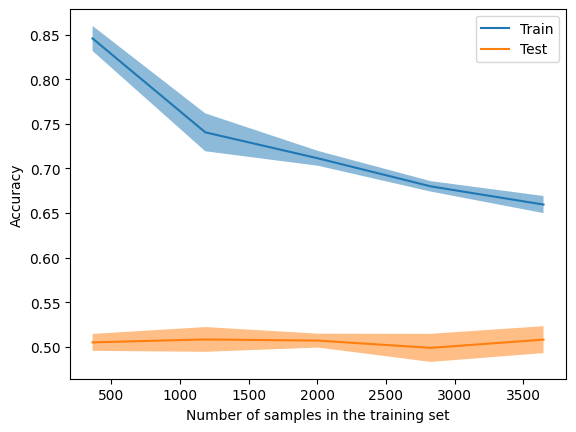

In [102]:
LearningCurveDisplay.from_estimator(rf_clf,  X_prepared, y_train_val, scoring="accuracy")

AttributeError: 'list' object has no attribute 'min'

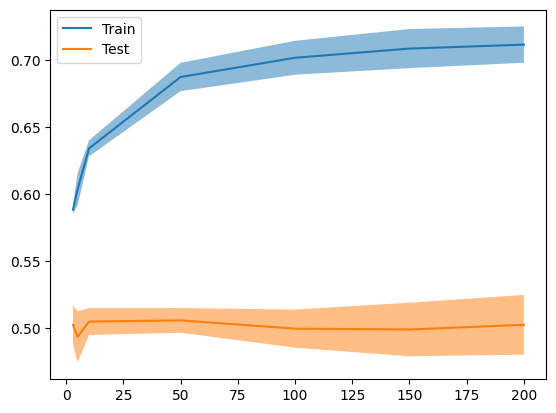

In [103]:
param_name = "n_estimators"
param_range = [3, 5, 10, 50, 100, 150, 200]
ValidationCurveDisplay.from_estimator(rf_clf,  X_prepared, y_train_val, param_name=param_name, param_range=param_range)

In [104]:
from scipy.stats import expon, uniform

In [105]:
param_grid = {
    "n_estimators": [50, 100, 120, 150, 200, 500],
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 4, 8, 12, 16],
    "max_features": ["sqrt", "log2"],
}

In [106]:
random_search =  RandomizedSearchCV(rf_clf, param_grid, n_iter=20, scoring="accuracy", cv=5)

In [107]:
random_search.fit( X_prepared, y_train_val)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    n_estimators=20),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 8, 12, 16],
                                        'n_estimators': [50, 100, 120, 150, 200,
                                                         500]},
                   scoring='accuracy')

In [108]:
random_search.cv_results_["mean_test_score"]

array([0.50701754, 0.50285088, 0.5       , 0.50219298, 0.5002193 ,
       0.50328947, 0.50394737, 0.50175439, 0.50087719, 0.49912281,
       0.50241228, 0.50789474, 0.50131579, 0.4995614 , 0.50723684,
       0.5       , 0.50087719, 0.49671053, 0.50548246, 0.50526316])

In [109]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [110]:
y_pred = cross_val_predict(rf_clf, X_prepared, y_train_val, cv=5)

In [111]:
confusion_matrix(y_train_val, y_pred), precision_score(y_train_val, y_pred), recall_score(y_train_val, y_pred), f1_score(y_train_val, y_pred)

(array([[1608,  722],
        [1553,  677]], dtype=int64),
 0.4839170836311651,
 0.30358744394618836,
 0.3731055387158997)

### DNN

In [112]:
from tensorflow import keras

In [198]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_prepared.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="softmax")
])

In [208]:
opt = keras.optimizers.SGD(0.001)
model.compile(loss="binary_crossentropy",
             optimizer=opt, metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
history = model.fit(np.asarray(X_prepared).astype('float32'), y_train.to_numpy().reshape(-1, 1), epochs=1000,
                    validation_data=(np.asarray(X_val_prepared).astype('float32'), y_val.to_numpy().reshape(-1, 1)), callbacks=[early_stopping_cb])

Epoch 1/1000
119/119 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 2/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 3/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 4/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 5/1000
119/119 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 6/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.4737
Epoch 7/1000
119/119 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy:

In [206]:
y_pred = model.predict(np.asarray(X_val_prepared).astype('float32'))

24/24 [==============================] - 0s 2ms/step


In [207]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [191]:
accuracy_score(y_val, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets